In [60]:
#import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [61]:
#read the dataset
data = pd.read_csv('data.csv' , header = None, names=['Score1', 'Score2', 'Status']) 
data.head()

,Score1,Score2,Status
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [62]:

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Score1,100.0,65.644274,19.458222,30.058822,50.919511,67.032988,80.212529,99.827858
Score2,100.0,66.221998,18.582783,30.603263,48.179205,67.682381,79.360605,98.869436
Status,100.0,0.600000,0.492366,0.000000,0.000000,1.000000,1.000000,1.000000


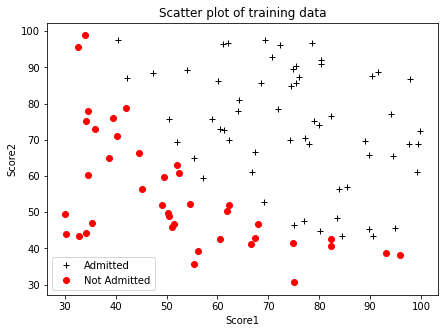

In [63]:
plt.figure(figsize=(7, 5))
plt.xlabel('Score1')
plt.ylabel('Score2')
plt.title('Scatter plot of training data')
plt.plot(data['Score1'][data['Status']==1],data['Score2'][data['Status']==1], 'k+',label='Admitted')
plt.plot(data['Score1'][data['Status']==0],data['Score2'][data['Status']==0], 'ro',label='Not Admitted')
plt.legend()

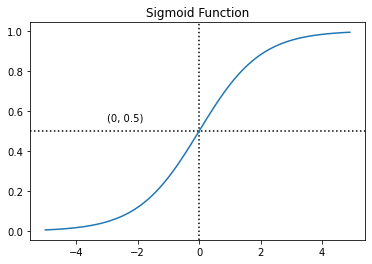

Evaluate sigmoid(0) = 0.5


In [64]:
# Visualize the sigmoid function
def sigmoid(z):
    """
    The sigmoid function.
    Args:
        z: float, vector, matrix
    Returns:
        sigmoid: float
    """
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid
x = np.arange(-5, 5, 0.1)
plt.axhline(y=0.5, c='black', ls=':')
plt.axvline(x=0, c='black', ls=':')
plt.annotate('(0, 0.5)', xy=(0, 0.5), xytext=(-3, 0.55))
plt.plot(x, sigmoid(x))
plt.title('Sigmoid Function')
plt.show()

print('Evaluate sigmoid(0) =', sigmoid(0))

In [66]:
# Get the number of features.
n = len(data.columns)-1 # subtract 1 for the target column

# Create a function to pepare the data.
def prepareData(data, n):
    """
    Add 1s column, convert to arrays,
    initialize theta.
    Args:
        data: read the data file
        n: int
    Return:
        x: a (m, n+1) array
        y: a (m, 1) array
        theta: a (n+1, 1) array
    """
    # Add a column with 1s in the data set.
    data.insert(0, 'Ones', 1)

    # Define x and y, separating the data set.
    x = data.iloc[:, 0:n+1]
    y = data.iloc[:, n+1:n+2]

    # Convert to arrays, so this function is
    # compatible with scipy.optimize.fmin later.
    # Initialize parameters theta to 0s.
    # Theta is a (n+1, 1) array,
    # where n is the number of features.
    x = np.array(x.values)
    y = np.array(y.values)
    theta = np.zeros((n+1, 1))
    return x, y, theta

x, y, theta = prepareData(data, n)

print('Checking the dimensions of the matrices x, y, theta...')
print(x.shape, y.shape, theta.shape)

Checking the dimensions of the matrices x, y, theta...
(100, 3) (100, 1) (3, 1)


In [67]:
# Create a function to compute the cost.
def computeCost(theta, x, y):
    """
    Compute the cost function.
    Args:
        theta: array shape(n+1, 1) 
        x: array shape(m, n+1) 
        y: array shape(m, 1)
    Returns:
        cost: float
    """
    m = len(x)
    # Do matrix multiplication with numpy.dot
    h_theta = sigmoid(np.dot(x, theta))
    term1 = np.dot(-y.T, np.log(h_theta))
    term2 = np.dot((1 - y).T, np.log(1 - h_theta))
    cost = np.sum(term1 - term2) / m
    return cost

print('The cost with initial θ equals to zeros, is:')
print(computeCost(theta, x, y))

The cost with initial θ equals to zeros, is:
0.6931471805599452


In [68]:
#Parameters Using the fmin Algorithm
from scipy.optimize import fmin

def minimizeCost(computeCost, theta, x, y):
    """
    Minimize the cost function.
    Args:
        computeCost: The function to be minimized
        theta: initial guess, array shape(n+1, 1)
        x: array shape(m, n+1)
        y: array shape(m, 1)
    Returns:
        theta: array shape(n+1, 1), the parameters that minimize the cost
    """
    min_cost = fmin(func=computeCost, x0=theta, args=(x, y))
    return min_cost

theta = minimizeCost(computeCost, theta, x, y)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [69]:
print("Optimal theta parameters:")
print(theta)
print("\nCost of optimal theta:")
print(computeCost(theta, x, y))

Optimal theta parameters:
[-25.16130062   0.20623142   0.20147143]

Cost of optimal theta:
0.20349770159021519


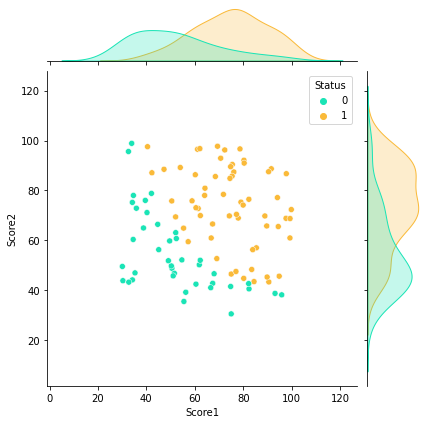

In [103]:
#Visualize the data
L =  sn.jointplot("Score1","Score2", data=data, hue="Status", palette='turbo', legend='full')
plt.show()

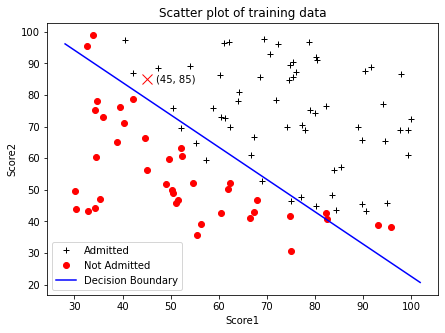

Admission probability for scores (45, 85)= 0.7762915904112411


In [70]:
#Evaluate LG R.
plot_x = np.array([np.min(x[:, 1]) - 2, np.max(x[:, 1] + 2)])
plot_y = -(theta[0] + theta[1] * plot_x) / theta[2]

plt.figure(figsize=(7, 5))
plt.xlabel('Score1')
plt.ylabel('Score2')
plt.title('Scatter plot of training data')
plt.plot(data['Score1'][data['Status']==1],data['Score2'][data['Status']==1], 'k+',label='Admitted')
plt.plot(data['Score1'][data['Status']==0],data['Score2'][data['Status']==0], 'ro',label='Not Admitted')
plt.plot(plot_x, plot_y, 'b-', label='Decision Boundary')
plt.plot(45, 85, 'rx', ms=10)
plt.annotate('(45, 85)', xy=(45, 85), xytext=(47, 84))
plt.legend()
plt.show()

probability = sigmoid(np.dot(np.array([1, 45, 85]), theta))
print('Admission probability for scores (45, 85)=', probability)

In [71]:
# Create a predict function.
def predictAdmission(x, theta):
    """
    Predict whether a student will be admitted.
    Args:
        x: array shape(m, n+1)
        theta: ndarray, the optimal parameters of the cost function
    Returns:
        predicted: array shape(m,) of booleans
    """
    probability = np.array(sigmoid(np.dot(x, theta)))
    predicted = probability >= 0.5
    return predicted

predicted = predictAdmission(x, theta)
correct = np.sum(predicted.astype(int) == y.reshape(100))
total = len(predicted)
print('Accuracy score: {}%'.format(100 * correct / total))

Accuracy score: 89.0%


In [72]:
#using Scikit-Learn
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='newton-cg', max_iter=400)
log_reg.fit(data[['Score1', 'Score2']].values,data.Status.values)

LogisticRegression(max_iter=400, solver='newton-cg')

In [73]:
log_reg.intercept_, log_reg.coef_

(array([-25.05200378]), array([[0.2053533 , 0.20058239]]))

In [74]:

log_reg.score(data[['Score1', 'Score2']].values,data.Status.values)

0.89

In [75]:
#Regularization
#read the dataset
data2 = pd.read_csv('data2.csv' , header = None, names=['test1', 'test2', 'Status']) 
data2.head()


,test1,test2,Status
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


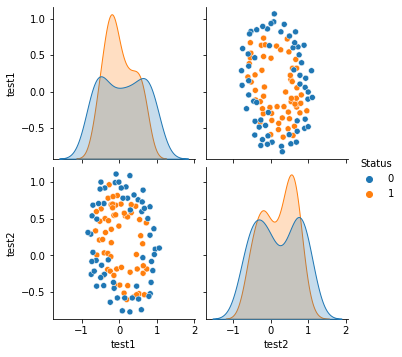

In [76]:
#check the distribution of the data
sn.pairplot(data2, hue='Status')

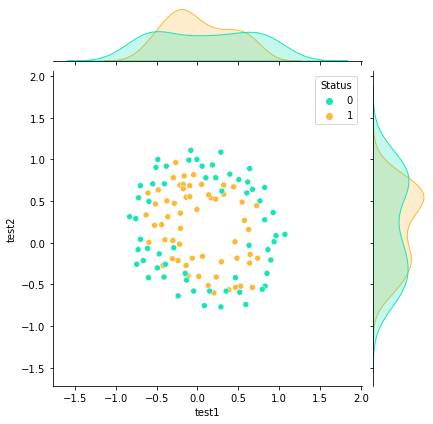

In [77]:
D = sn.jointplot(y="test2", x="test1", data=data2, hue="Status", palette='turbo', legend='full')
plt.show()

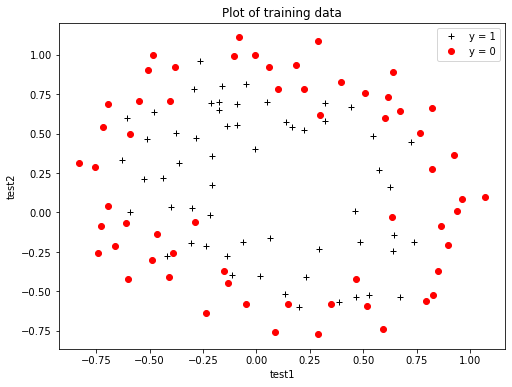

In [12]:
#visualize data
plt.figure(figsize=(8, 6))
plt.xlabel('test1')
plt.ylabel('test2')
plt.title('Plot of training data')
plt.plot(data2['test1'][data2['Status']==1],data2['test2'][data2['Status']==1], 'k+',label='y = 1')
plt.plot(data2['test1'][data2['Status']==0],data2['test2'][data2['Status']==0], 'ro',label='y = 0')
plt.legend()
plt.show()

In [78]:
#feature mapping
def map_feature(X1, X2, degree):
    X1 = np.array(X1).reshape(-1,1)
    X2 = np.array(X2).reshape(-1,1)
    
    out = np.ones((X1.shape[0], 1))
    for i in range(1, degree+1):
        for j in range(0, i+1):
            p = (X1**(i-j)) * (X2**j)
            out = np.append(out, p, axis=1)
    return out


In [79]:
def compute_gradient(X, y, w, b, lambda_=None): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) values of parameters of the model      
      b : (scalar)                 value of parameter of the model 
      lambda_: unused placeholder.
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    ### START CODE HERE ### 
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          
        err_i  = f_wb_i  - y[i]                       
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m                                   
        
    ### END CODE HERE ###
    return dj_db, dj_dw

In [80]:

X_p = map_feature(data2.test1.values, data2.test2.values, 6)
X_p.shape

(118, 28)

In [81]:
# Cost Function and Gradient
def cost_function_reg(theta, X, y, lambda_reg):
    m = y.shape[0]
    theta = theta[:, np.newaxis] 
    h = sigmoid(X.dot(theta))
    J = (1/m) * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h))) + (lambda_reg/(2*m)) * np.sum(theta[1:]**2)

    diff_hy = h - y
    grad = (1/m) * diff_hy.T.dot(X) + ((lambda_reg/m) * theta.T)
    grad[0, 0] = (1/m) * diff_hy.T.dot(X[:, 0])

    return J, grad

In [82]:
import scipy.optimize as opt
def optimize_theta_reg(X, y, initial_theta, lambda_reg):
    opt_results = opt.minimize(cost_function_reg, initial_theta, args=(X, y, lambda_reg), method='TNC', jac=True, options={'maxiter':400})
    return opt_results['x'], opt_results['fun']

In [83]:
m = data2.shape[0]
X = X_p
y = np.array(data2.Status.values).reshape(-1,1)
initial_theta = np.zeros(shape=(X.shape[1]))

lambda_reg = 1
cost, grad = cost_function_reg(initial_theta, X, y, lambda_reg)
print('Cost at initial theta (zeros):', cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros) - top 5:')
print(grad.T[:5])
print('Expected gradients top 5(approx):\n 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115')

Cost at initial theta (zeros): [[0.69314718]]
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - top 5:
[[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]]
Expected gradients top 5(approx):
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115


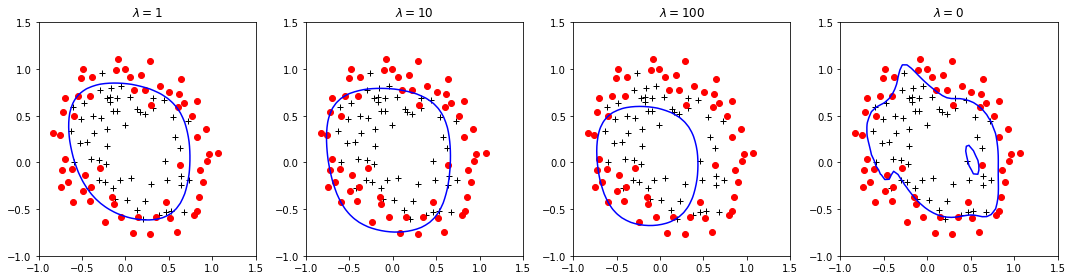

In [84]:
#Decision Boundary
lambda_reg = [1, 10, 100, 0]
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15,4))
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)

for il, l in enumerate(lambda_reg):
    theta_opt, cost = optimize_theta_reg(X, y, initial_theta, l)
    z = np.zeros((u.shape[0], v.shape[0]))
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = map_feature(u[i], v[j], 6).dot(theta_opt)
    
    axs[il].plot(data2['test1'][data2['Status']==1],data2['test2'][data2['Status']==1], 'k+',label='y = 1')
    axs[il].plot(data2['test1'][data2['Status']==0],data2['test2'][data2['Status']==0], 'ro',label='y = 0')
    
    axs[il].contour(u, v, z.T, levels=[0], colors='blue')
    axs[il].set_title('$\lambda={}$'.format(l))
fig.tight_layout()
plt.show()


In [85]:
#evaluate accuracy 
lambda_reg = 1
theta, cost = optimize_theta_reg(X, y, initial_theta, lambda_reg)
theta

array([ 1.27271027,  0.62529965,  1.18111687, -2.019874  , -0.91743188,
       -1.4316693 ,  0.12393227, -0.36553118, -0.35725405, -0.17516293,
       -1.45817009, -0.05098418, -0.61558557, -0.27469166, -1.19271298,
       -0.24217841, -0.20603302, -0.04466177, -0.27778948, -0.29539514,
       -0.45645982, -1.04319154,  0.02779373, -0.29244866,  0.01555759,
       -0.32742404, -0.1438915 , -0.92467487])

In [86]:
#opt_theta, cost = optimize_theta(X, y, initial_theta)
def predict(X, theta):
    y_pred = [1 if sigmoid(X[i, :].dot(theta)) >= 0.5 else 0 for i in range(0, X.shape[0])]
    return y_pred
#X = np.hstack((np.ones((m,1)),data2[['test1', 'test2']].values))

y_pred_prob = predict(X, theta)
f'Train accuracy: {np.mean(y_pred_prob == data2.Status.values) * 100}'


'Train accuracy: 83.05084745762711'

In [87]:
#check using using Scikit-Learn:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='newton-cg', max_iter=400)
log_reg.fit(X[:,1:], data2.Status.values)


LogisticRegression(max_iter=400, solver='newton-cg')

In [88]:

log_reg.intercept_, log_reg.coef_

(array([1.27273852]),
 array([[ 0.62527427,  1.18107953, -2.01995701, -0.91743361, -1.43166228,
          0.12400943, -0.36552879, -0.35723375, -0.1751281 , -1.45816817,
         -0.05099315, -0.61556795, -0.27470949, -1.19281161, -0.24218951,
         -0.20599958, -0.04473522, -0.27778736, -0.29537501, -0.45635027,
         -1.04321271,  0.02777197, -0.29243756,  0.0155633 , -0.32738395,
         -0.14388956, -0.92464266]]))

In [89]:
log_reg.score(X[:,1:], data2.Status.values)

0.8305084745762712